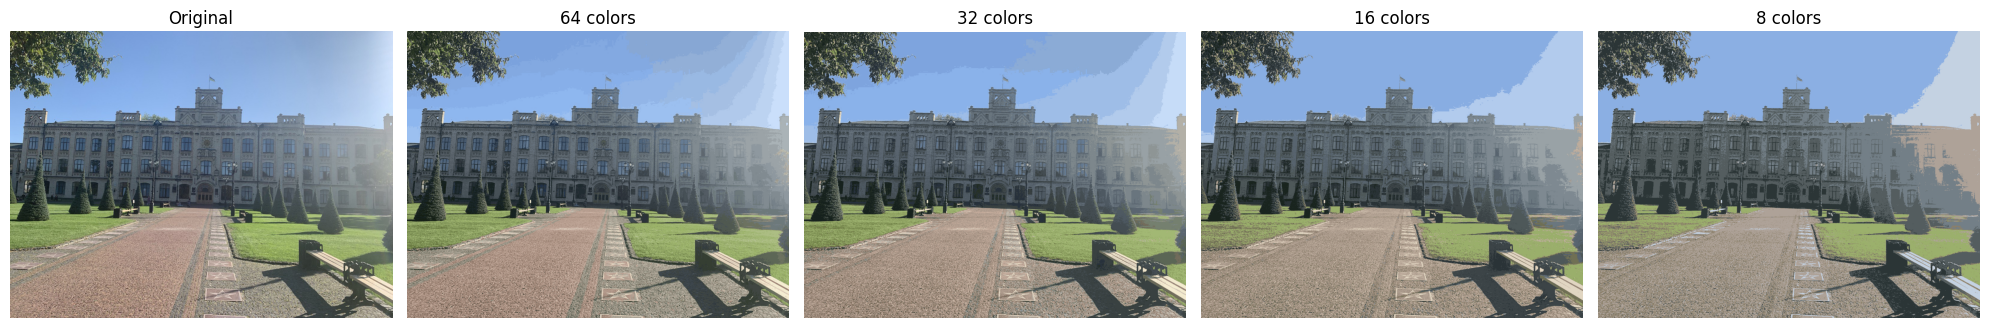

{64: '/content/kpi_quantized_64.jpg',
 32: '/content/kpi_quantized_32.jpg',
 16: '/content/kpi_quantized_16.jpg',
 8: '/content/kpi_quantized_8.jpg'}

In [4]:
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

# Завантаження зображення
image_path = "/content/kpi.jpg"
image = Image.open(image_path)
image_array = np.array(image)

# Функція для квантування кольорів
def quantize_image(image_array, n_colors):
    w, h, d = image_array.shape
    image_2d = np.reshape(image_array, (w * h, d))
    image_sample = shuffle(image_2d, random_state=0)[:1000]
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_sample)
    labels = kmeans.predict(image_2d)
    quantized_image = kmeans.cluster_centers_[labels].reshape(w, h, d)
    return np.clip(quantized_image, 0, 255).astype('uint8')

# Квантування зображення для різних рівнів кольорів
quantized_images = {
    n_colors: quantize_image(image_array, n_colors)
    for n_colors in [64, 32, 16, 8]
}

# Збереження та вивід зображень
output_paths = {}
fig, axs = plt.subplots(1, 5, figsize=(20, 10))
axs[0].imshow(image)
axs[0].set_title("Original")
axs[0].axis("off")

for i, (n_colors, quantized_image) in enumerate(quantized_images.items(), start=1):
    output_path = f"/content/kpi_quantized_{n_colors}.jpg"
    Image.fromarray(quantized_image).save(output_path)
    output_paths[n_colors] = output_path

    axs[i].imshow(quantized_image)
    axs[i].set_title(f"{n_colors} colors")
    axs[i].axis("off")

plt.tight_layout()
plt.show()

output_paths